In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments

┌ Info: Precompiling ReinforcementLearning [158674fc-8238-5cab-b5ba-03dfc80d1318]
└ @ Base loading.jl:1264
┌ Warning: /mnt/E4E0A9C0E0A998F6/github/ReinforcementLearning.jl/src/components/agents/q_agents is not an existing directory, Revise is not watching
└ @ Revise /home/tj/.julia/packages/Revise/D6h31/src/Revise.jl:419
┌ Warning: /mnt/E4E0A9C0E0A998F6/github/ReinforcementLearning.jl/src/patches is not an existing directory, Revise is not watching
└ @ Revise /home/tj/.julia/packages/Revise/D6h31/src/Revise.jl:419


To get the value estimation of the Grid World example, we create a distribution based environment model to describe the Grid World first.

In [2]:
const GridWorldLinearIndices = LinearIndices((5,5))
const GridWorldCartesianIndices = CartesianIndices((5,5))

function nextstep(s::CartesianIndex{2}, a::CartesianIndex{2})
    if s == CartesianIndex(1, 2)
        ns, r = CartesianIndex(5, 2), 10.
    elseif s == CartesianIndex(1, 4)
        ns, r = CartesianIndex(3, 4), 5.
    else
        ns = s + a
        if 1 ≤ ns[1] ≤ 5 && 1 ≤ ns[2] ≤ 5
            ns, r = ns, 0.
        else
            ns, r = s, -1.
        end
    end
    [(nextstate=GridWorldLinearIndices[ns], reward=r, prob=1.0)]
end

const GridWorldActions = [CartesianIndex(-1, 0),
                          CartesianIndex(1,0),
                          CartesianIndex(0, 1),
                          CartesianIndex(0, -1)]

const GridWorldEnvModel = DeterministicDistributionModel([nextstep(GridWorldCartesianIndices[s], a) for s in 1:25, a in GridWorldActions]);

Here, the `GridWorldEnvModel` is an instance of `DeterministicDistributionModel`. It is used to describe the the grid world in Figure 3.2 on the book. Given a state `s` and an action `a`, we can get an Array of the probability of the reward to receive and next state. 

![fig_3_2.png](img/fig_3_2.png)

In [3]:
GridWorldEnvModel(1, 2)

1-element Array{NamedTuple{(:nextstate, :reward, :prob),Tuple{Int64,Float64,Float64}},1}:
 (nextstate = 2, reward = 0.0, prob = 1.0)

In [4]:
n_state, n_action = length(observation_space(GridWorldEnvModel)), length(action_space(GridWorldEnvModel))

(25, 4)

Then we create a random policy:

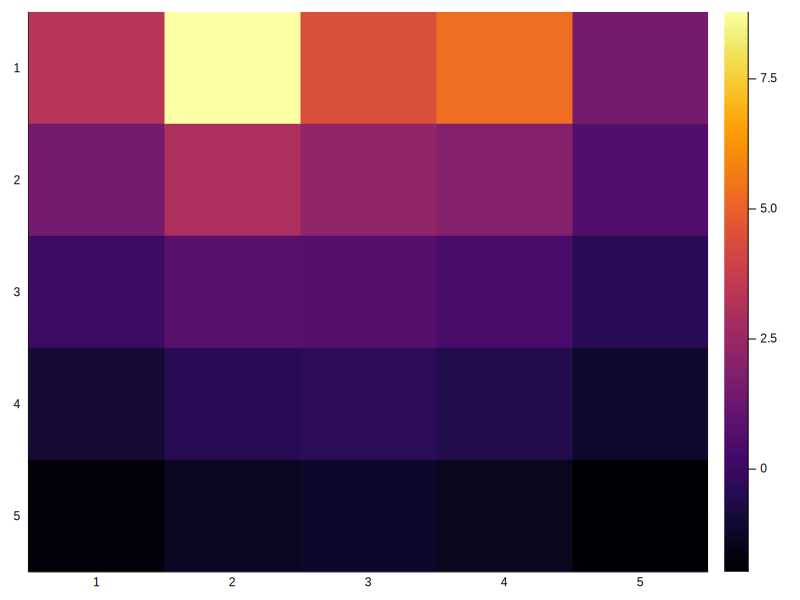

In [5]:
using Plots

default(size=(800, 600))
using StatsBase:sample, Weights

V = TabularVApproximator(n_state)

policy_evaluation!(
    V = V,
    π=TabularRandomPolicy(fill(1 / n_action, n_state, n_action)),
    model=GridWorldEnvModel
)

heatmap(1:5, 1:5, reshape(V.table, 5,5), yflip=true)

Next, we can try the policy iteration method with a `DeterministicPolicy` policy:

In [6]:
V = TabularVApproximator(n_state)

policy_iteration!(;
    V=V,
    π=TabularDeterministicPolicy(rand(1:n_action, n_state), n_action),
    model=GridWorldEnvModel
)

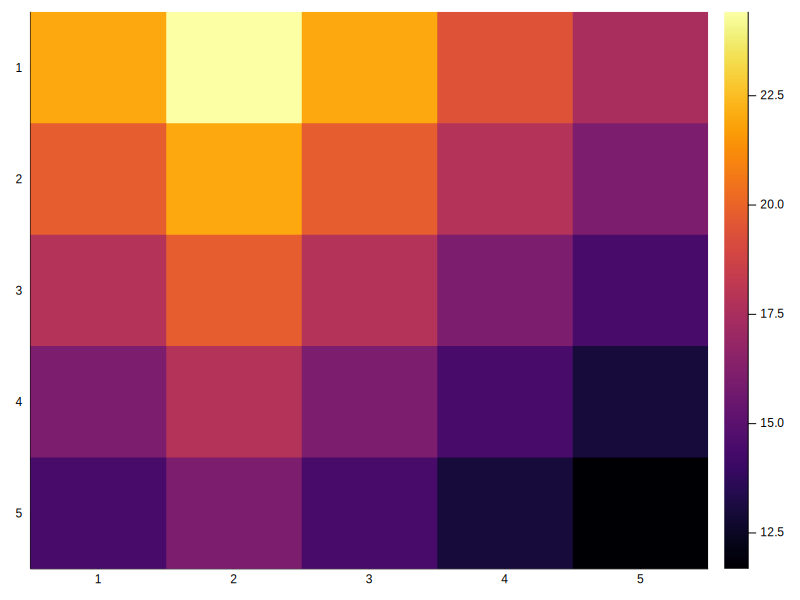

In [7]:
heatmap(1:5, 1:5, reshape(V.table, 5,5), yflip=true)